# Automobile database

## Exploratory data analysis 
Explore the automobile.py dataset and draw some meaningful conclusions based on the data.

## Import Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### Load the Data
Load the automobile.txt file and explore the data

In [2]:
automobile_df = pd.read_csv("automobile.txt", delimiter = ",")
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
automobile_df.shape

(205, 26)

# Data Cleansing

In [4]:
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
automobile_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

- There are no null values from the first sight

In [8]:
automobile_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
Manufacturers = automobile_df["make"].unique()
Manufacturers

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
automobile_df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
automobile_df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [12]:
automobile_df["num-of-doors"].unique()

array(['two', 'four', '?'], dtype=object)

### Count "?" in num-of-doors, if it's a high number of doors replace it with unknown, if not drop those 

In [15]:
unknown_doors = automobile_df[automobile_df["num-of-doors"] == "?"].count().sum()
print(f"The number of ? in the number of doors column is: {unknown_doors}")

The number of ? in the number of doors column is: 52


In [16]:
52/205

0.25365853658536586

* Since "?" exit;s the 25% of the values in the dataset, change the name from ? to unknown

In [18]:
automobile_df["num-of-doors"].replace("?", "unknown", inplace=True)
automobile_df["num-of-doors"].unique()

array(['two', 'four', 'unknown'], dtype=object)

In [19]:
automobile_df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [21]:
automobile_df["bore"] = pd.to_numeric(automobile_df["bore"], errors='coerce', downcast='float')
automobile_df["stroke"] = pd.to_numeric(automobile_df["stroke"], errors='coerce', downcast='float')
automobile_df["normalized-losses"] = pd.to_numeric(automobile_df["normalized-losses"], errors='coerce', downcast='integer')
automobile_df["horsepower"] = pd.to_numeric(automobile_df["horsepower"], errors='coerce', downcast='integer')
automobile_df["price"] = pd.to_numeric(automobile_df["price"], errors='coerce', downcast='integer')
automobile_df["peak-rpm"] = pd.to_numeric(automobile_df["peak-rpm"], errors='coerce', downcast='integer')

### Unique values for each categorical column

In [22]:
for column_name, dtype in automobile_df.dtypes.items():
    if dtype == 'object':
        unique_values = automobile_df[column_name].unique()
        print(f"Column: {column_name}, Data Type: {dtype}, Unique Values: {unique_values}")

Column: make, Data Type: object, Unique Values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Column: fuel-type, Data Type: object, Unique Values: ['gas' 'diesel']
Column: aspiration, Data Type: object, Unique Values: ['std' 'turbo']
Column: num-of-doors, Data Type: object, Unique Values: ['two' 'four' 'unknown']
Column: body-style, Data Type: object, Unique Values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Column: drive-wheels, Data Type: object, Unique Values: ['rwd' 'fwd' '4wd']
Column: engine-location, Data Type: object, Unique Values: ['front' 'rear']
Column: engine-type, Data Type: object, Unique Values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Column: num-of-cylinders, Data Type: object, Unique Values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Column: fuel-system, Data Type: obj

* For peak-rpm column replace ? with n/a

In [23]:
automobile_df["peak-rpm"].replace("?", " ", inplace=True)
automobile_df["peak-rpm"]

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

In [24]:
automobile_df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2])

In [25]:
automobile_df = automobile_df.rename(columns={"make" : "Manufacturers"})

In [26]:
automobile_df

,symboling,normalized-losses,Manufacturers,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [27]:
# find NAN
automobile_df.isna().sum()

symboling             0
normalized-losses    41
Manufacturers         0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [28]:
automobile_df = automobile_df.dropna(axis=0)
automobile_df.isna().sum()

symboling            0
normalized-losses    0
Manufacturers        0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

*Pairplot: showing the relathioships between each numeric feature

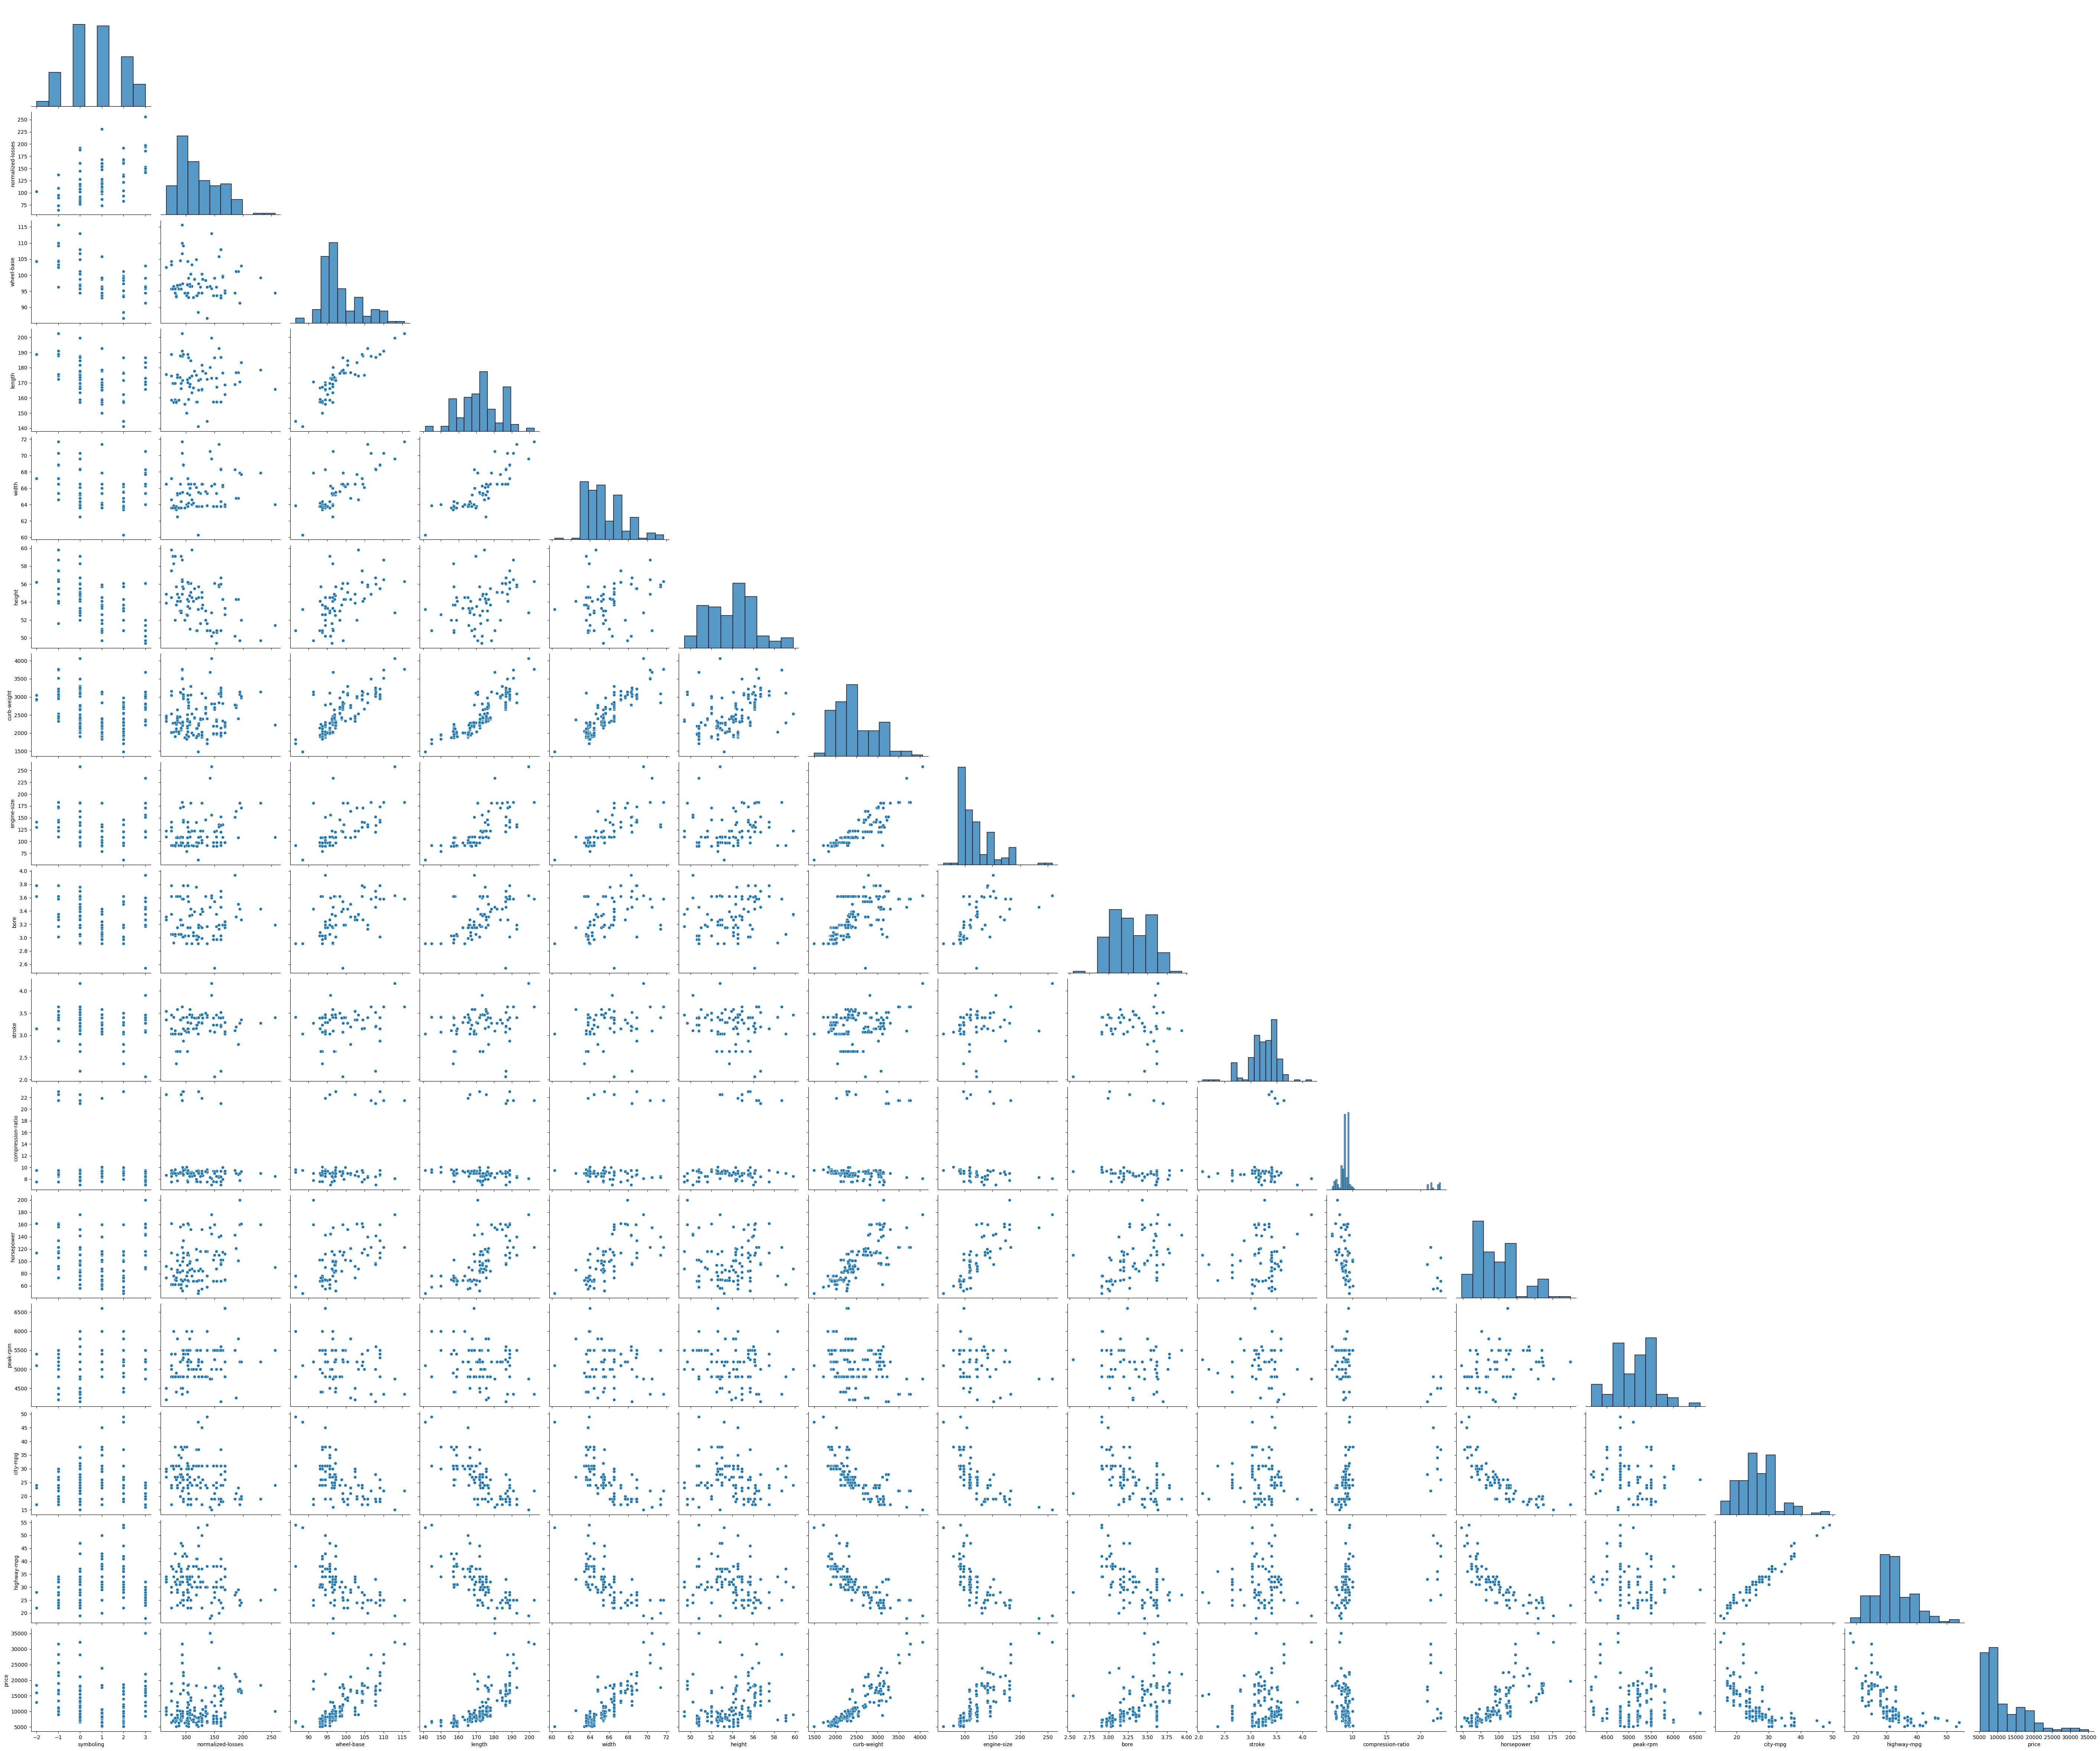

In [29]:
sns.pairplot(automobile_df, diag_kind="hist", height = 3, aspect=1.2, corner=True)

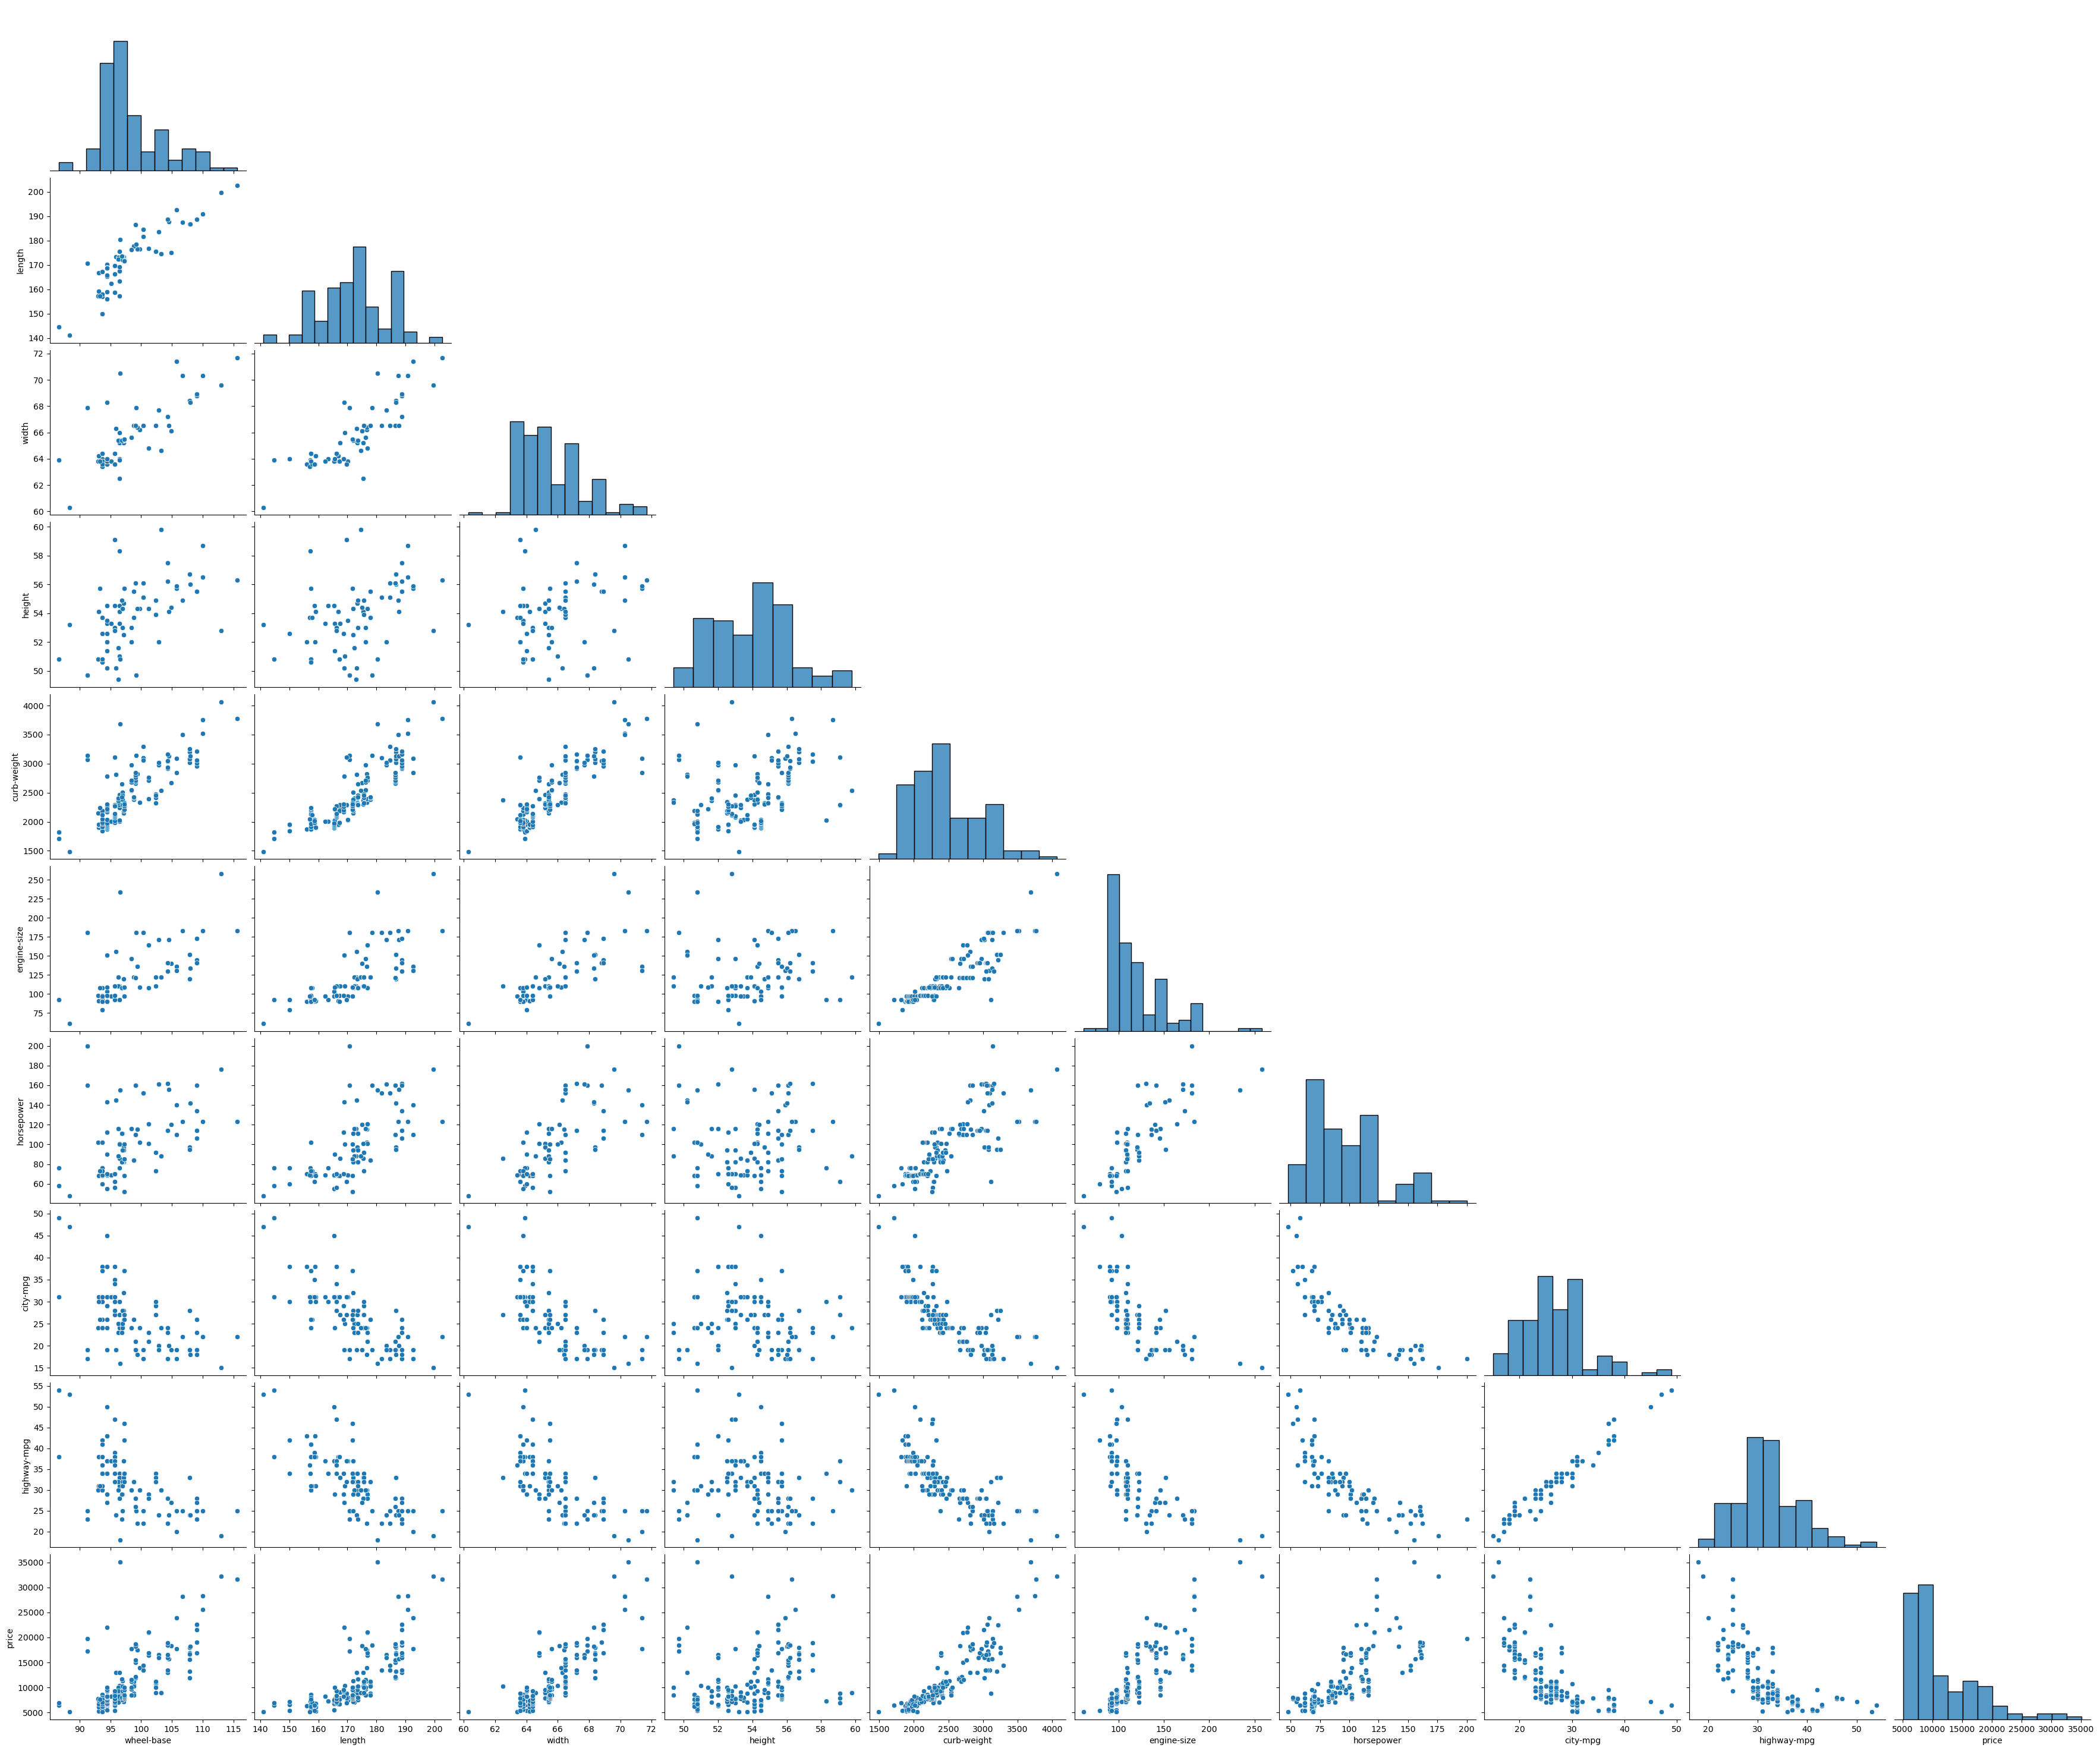

In [30]:
automobile_df2 = automobile_df.drop(columns= ["stroke", "bore", "compression-ratio", "peak-rpm", "symboling", "normalized-losses"])

# Pairplot: showing the relationships between each numeric feature
sns.pairplot(automobile_df2, diag_kind = "hist", height = 3, aspect = 1.2, corner = True)


Initial observations from paiplot:
* Price of cars are positive related with car's length, width, curb-weight, engine-size and horsepower. This suggests that more powerfull and larger cars are mosr expenssive than smaller.
* Horsepower, curb-weight and engine-size are positively correlated with each other, suggesting that cars with larger engine-size and curb-weight have more horsepower.

In [31]:
automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.737500,121.300000,98.235625,172.319375,65.596250,53.878750,2459.450000,119.093750,3.298437,3.237314,10.145125,95.875000,5116.250000,26.506250,32.068750,11427.681250
std,1.189511,35.602417,5.163763,11.548860,1.946999,2.276608,480.897834,30.411186,0.267348,0.294210,3.882507,30.625708,465.290536,6.081208,6.440948,5863.789011
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.525000,64.000000,52.000000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,114.000000,96.900000,172.200000,65.400000,54.100000,2338.500000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9164.000000
75%,2.000000,148.000000,100.600000,177.800000,66.500000,55.500000,2808.750000,134.500000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


* Which are the most expensive manufacturers?

In [34]:
expensive_cars = automobile_df.sort_values(["price"], ascending = False)
expensive_cars.head()

,symboling,normalized-losses,Manufacturers,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0


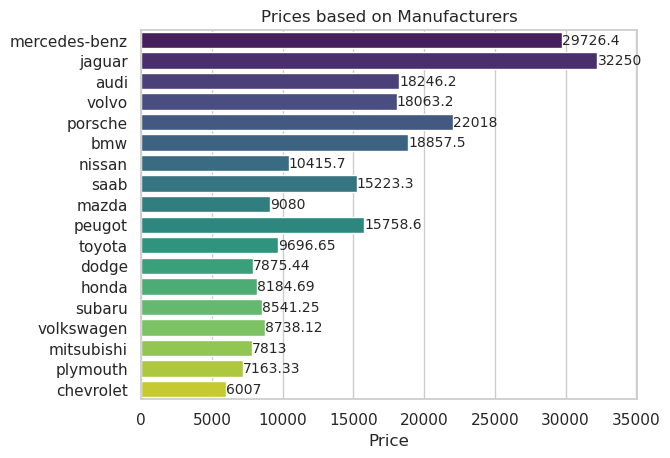

In [35]:
#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure1 = sns.barplot(data = expensive_cars, 
            y= expensive_cars["Manufacturers"], 
            x= expensive_cars["price"], 
            hue_order= expensive_cars["price"],
            palette= "viridis",
            errorbar=None
            )
#Add title
figure1.set_title("Prices based on Manufacturers")

#Add exact values for each bas:
figure1.bar_label(figure1.containers[0], fontsize=10)

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, expensive_cars["price"].max() )  # Adjust the upper limit as needed

#Show plot
plt.show()


* The most expenssive cars are from jaguar, mercedes-benz, bmw, and porsche 
* The cheapest cars are frim chevrolet, renault, isuzu, subaru, plymouth, honda, dodge and mitsubishi

> #### Does the body-style of car correlated with the price?

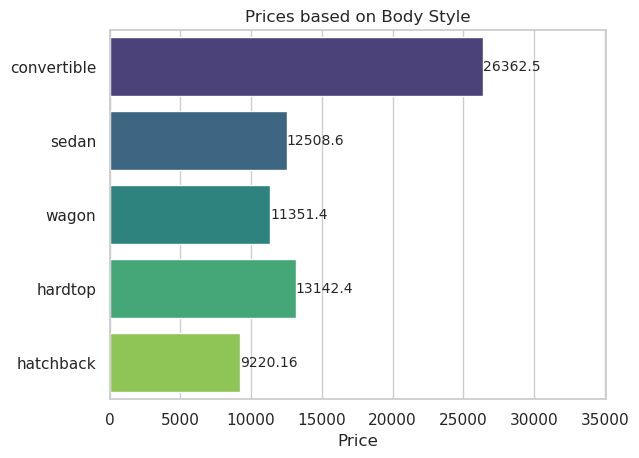

In [36]:
#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure1 = sns.barplot(data = expensive_cars, 
            y= expensive_cars["body-style"], 
            x= expensive_cars["price"], 
            hue_order= expensive_cars["price"],
            palette= "viridis",
            errorbar=None
            )
#Add title
figure1.set_title("Prices based on Body Style")

#Add exact values for each bas:
figure1.bar_label(figure1.containers[0], fontsize=10)

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, expensive_cars["price"].max() )  # Adjust the upper limit as needed

#Show plot
plt.show()


* The most expessive car type is the convertible, more than double price from sedan, wagon adn hartop and triple from hatchback.
* It is more economic to buy a hatchback so far.

> #### Compare numbers of cars, hue= fuel-type

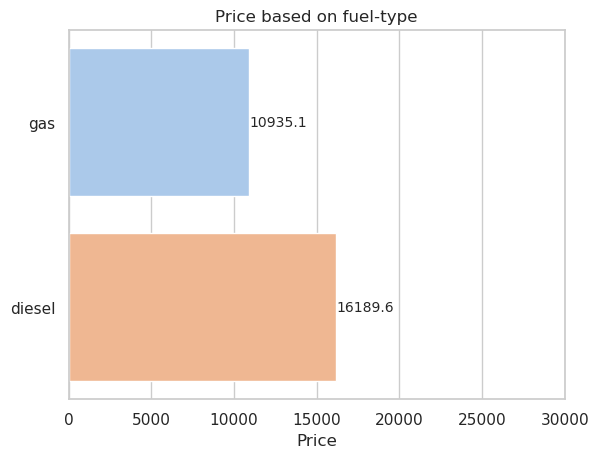

In [40]:
#Create the barplot figure3
figure3 = sns.barplot(data=automobile_df, 
                      y=automobile_df["fuel-type"], 
                      x=automobile_df["price"], 
                      hue_order=automobile_df["price"],
                      palette="pastel",
                      errorbar=('ci', False)
                     )

# Add title
figure3.set_title("Price based on fuel-type")

#Add exact values for each bas:
figure3.bar_label(figure3.containers[0], fontsize=10)

#Remove y axis
figure3.set(ylabel="")

#Change x axis
figure3.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, 30000)  # Adjust the upper limit as needed

# Show plot
plt.show()



* Also diedel cars are generally more expenssive than gas cars.
But lets see how economic they are in terms of consumption. 

* Something to consider before buying or manufacture a car is the engine type. With ohcv being more expenssive than the rest engines and ohcf the cheapest. 

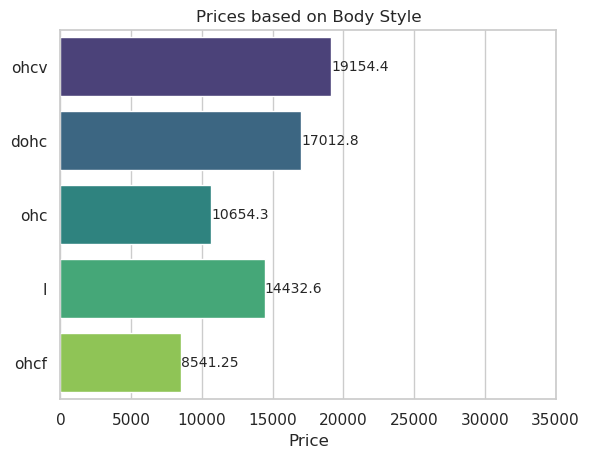

In [39]:
#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure1 = sns.barplot(data = expensive_cars, 
            y= expensive_cars["engine-type"], 
            x= expensive_cars["price"], 
            hue_order= expensive_cars["price"],
            palette= "viridis",
            errorbar=None
            )
#Add title
figure1.set_title("Prices based on Body Style")

#Add exact values for each bas:
figure1.bar_label(figure1.containers[0], fontsize=10)

#Remove y axis
figure1.set(ylabel="")

#Change x axis
figure1.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, expensive_cars["price"].max() )  # Adjust the upper limit as needed

#Show plot
plt.show()


> #### Compare body-type cars for highway-mpg and city-mpg to evaluate the economy of the fuel

In [41]:
df = automobile_df.groupby(automobile_df["body-style"])[["city-mpg", "highway-mpg"]]
df.count()

,city-mpg,highway-mpg
body-style,,
convertible,2,2
hardtop,5,5
hatchback,56,56
sedan,80,80
wagon,17,17


* There are not equal numbers of each body-type

[Text(0, 0.5, '')]

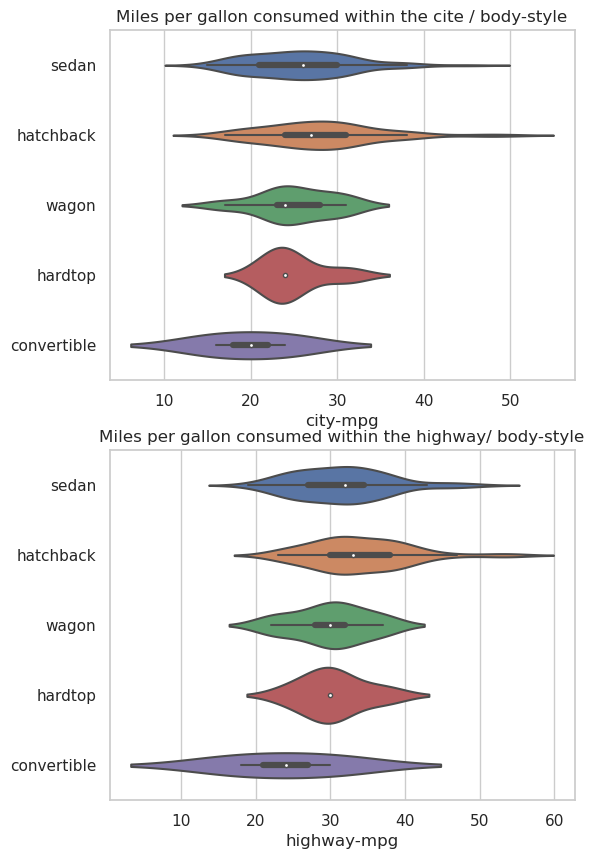

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(6, 10))  # 1 rows, 2 column

figure2=sns.violinplot(data=automobile_df, 
                       x="city-mpg",
                       y="body-style",
                       ax= axes[0]
                       )

figure2.set_title("Miles per gallon consumed within the cite / body-style")
#Change x axis
figure2.set(ylabel="")

figure2=sns.violinplot(data=automobile_df, 
                       x="highway-mpg",
                       y="body-style",
                       ax= axes[1]
                       )

figure2.set_title("Miles per gallon consumed within the highway/ body-style")
figure2.set(ylabel="")


* Although there are fewer numbers convertables to compared with the other types of cars, convertables seems to be the least economic cars, with tranrsing fewer miles per galon, especially in highway. 

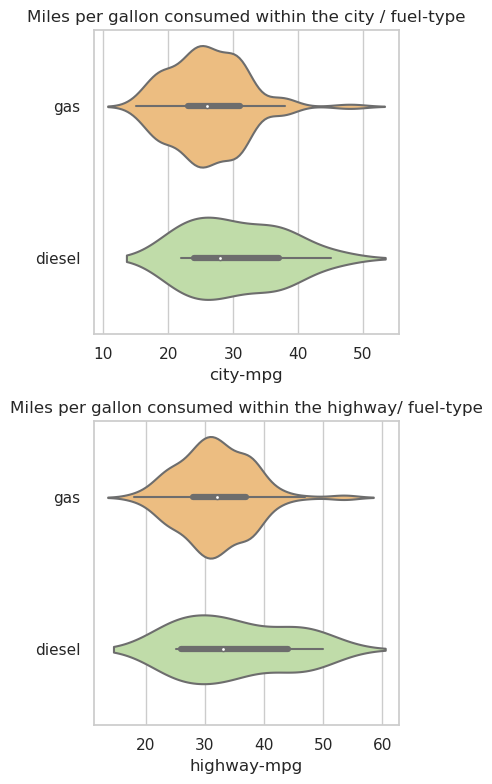

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))  # 1 rows, 2 column

figure6=sns.violinplot(data=automobile_df, 
                       x="city-mpg",
                       y="fuel-type",
                       ax= axes[0],
                       palette= "Spectral"
                       )

figure6.set_title("Miles per gallon consumed within the city / fuel-type")
#Change x axis
figure6.set(ylabel="")

figure7=sns.violinplot(data=automobile_df, 
                       x="highway-mpg",
                       y="fuel-type",
                       ax= axes[1],
                       palette= "Spectral"
                       )

figure7.set_title("Miles per gallon consumed within the highway/ fuel-type")
figure7.set(ylabel="")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

* Although dieasel cars are generally more expenssive than gas cars,they seem more economic in terms of fuel consumption both in cities and highways. With the majority of gas cars travelling less miles/gallon.
* More diesel cars can be more economic than gas cars in the highway 

> #### Which manufacturers produce the most economic cars? 

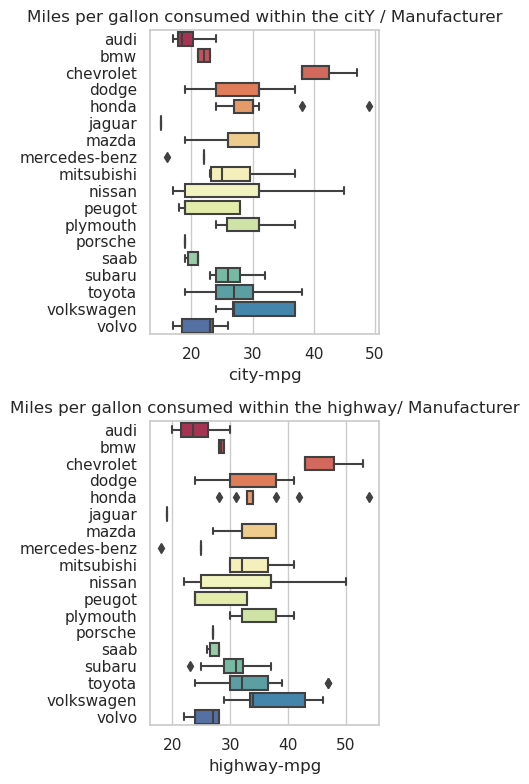

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(4, 8))  # 1 rows, 2 column

figure8=sns.boxplot(data=automobile_df, 
                       x="city-mpg",
                       y="Manufacturers",
                       ax= axes[0],
                       palette= "Spectral"
                       )

figure8.set_title("Miles per gallon consumed within the citY / Manufacturer")
#Change x axis
figure8.set(ylabel="")

figure9=sns.boxplot(data=automobile_df, 
                       x="highway-mpg",
                       y="Manufacturers",
                       ax= axes[1],
                       palette= "Spectral"
                       )

figure9.set_title("Miles per gallon consumed within the highway/ Manufacturer")
figure9.set(ylabel="")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
counts = automobile_df.groupby(["Manufacturers"])["Manufacturers"].count()
counts

Manufacturers
audi              4
bmw               4
chevrolet         3
dodge             9
honda            13
jaguar            1
mazda            11
mercedes-benz     5
mitsubishi       10
nissan           18
peugot            7
plymouth          6
porsche           1
saab              6
subaru           12
toyota           31
volkswagen        8
volvo            11
Name: Manufacturers, dtype: int64

* Chevrolet cars are the most economic one both in city and haighway travelling more miles per gallon. 
* Then plymouth, mitsubishi, volkswagen, honda, toyota and mazda produce economic cars tarvelling 30-40 miles per gallon in highway and 25-35 miles per gallon within city.
* The least economic cars both in city and highway are saab, bmw, porche, volvo, audi, jaguar and mercedes-benz
* However the values in this database are inbalance, with jaguar and porche having 1 car each, chevrolet (3), audi and bmw (4), mercedes-benz (5), plymout and saab(6) and so on. 

> #### Do cars with larger engine have beter performance on a highway or in the city? 

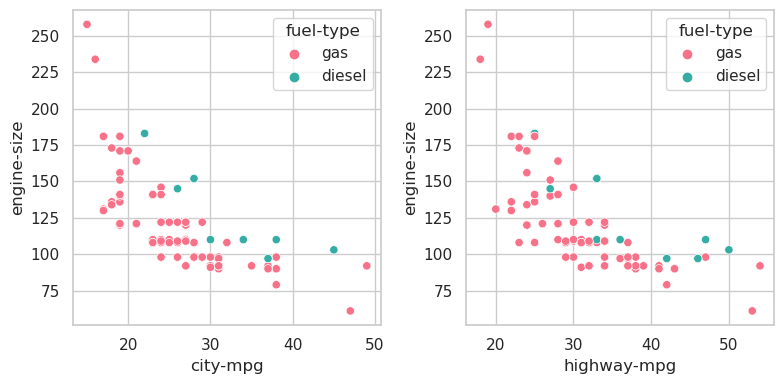

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 rows, 2 column

figure10= sns.scatterplot(data=automobile_df,
                      x="city-mpg", 
                      y="engine-size", 
                      hue="fuel-type",
                      ax= axes[0],
                      palette = ("husl")
                      )

figure11= sns.scatterplot(data=automobile_df,
                      x="highway-mpg", 
                      y="engine-size", 
                      hue="fuel-type",
                      ax= axes[1],
                      palette = ("husl")
                      )

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

* Engine size does make a difference in the gallons consuption
* Smaller engine cars are more economic, travelling more miles per gallon both in the city and highway

> #### Show the relationships between horsepower, and engine-size

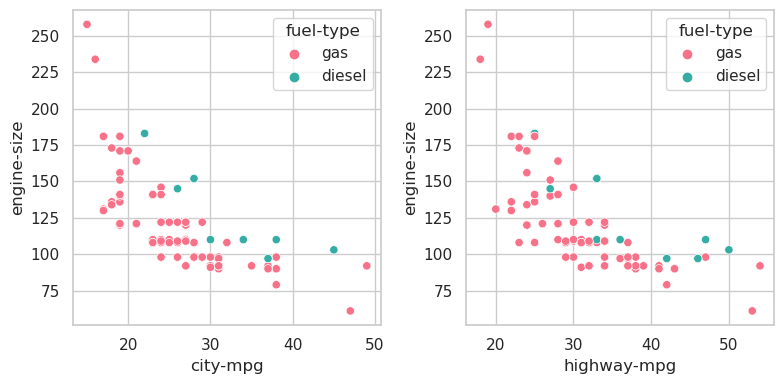

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 rows, 2 column

figure10= sns.scatterplot(data=automobile_df,
                      x="city-mpg", 
                      y="engine-size", 
                      hue="fuel-type",
                      ax= axes[0],
                      palette = ("husl")
                      )

figure11= sns.scatterplot(data=automobile_df,
                      x="highway-mpg", 
                      y="engine-size", 
                      hue="fuel-type",
                      ax= axes[1],
                      palette = ("husl")
                      )

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

* Similar with engine size, cars with lower horse power are more economic than the ones with higher horse power.

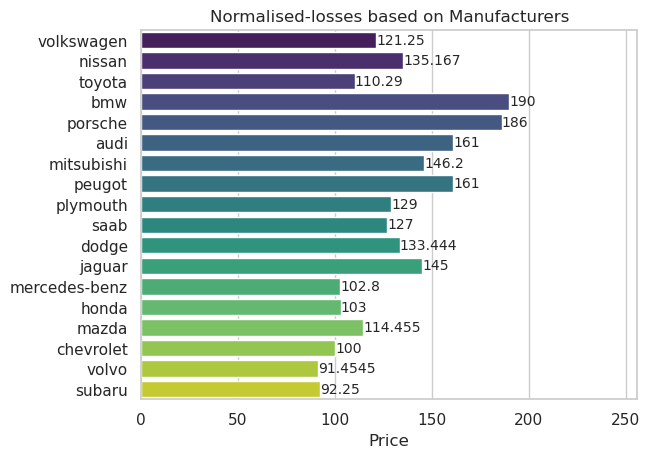

In [52]:
losses = automobile_df.sort_values(["normalized-losses"],ascending=False)

#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure12 = sns.barplot(data = losses, 
            y= losses["Manufacturers"], 
            x= losses["normalized-losses"], 
            hue_order= losses["price"],
            palette= "viridis",
            errorbar=None
            )
#Add title
figure12.set_title("Normalised-losses based on Manufacturers")

#Add exact values for each bas:
figure12.bar_label(figure12.containers[0], fontsize=10)

#Remove y axis
figure12.set(ylabel="")

#Change x axis
figure12.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, losses["normalized-losses"].max() )  # Adjust the upper limit as needed

#Show plot
plt.show()

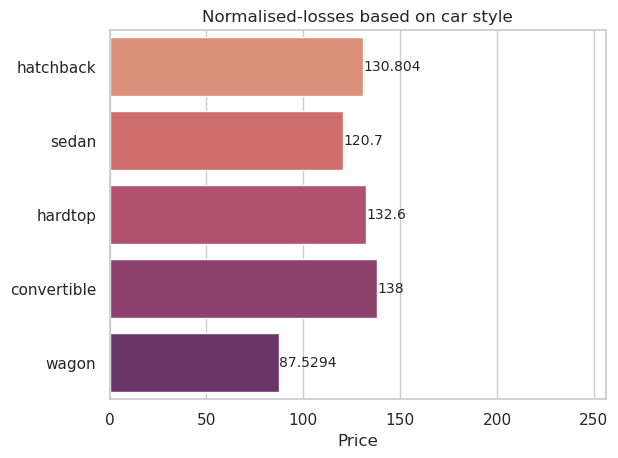

In [53]:
#Set grid behine graph
sns.set(style = "whitegrid")

#Create the barplot figure
figure13 = sns.barplot(data = losses, 
            y= losses["body-style"], 
            x= losses["normalized-losses"], 
            hue_order= losses["price"],
            palette= "flare",
            errorbar=None
            )
#Add title
figure13.set_title("Normalised-losses based on car style")

#Add exact values for each bas:
figure13.bar_label(figure13.containers[0], fontsize=10)

#Remove y axis
figure13.set(ylabel="")

#Change x axis
figure13.set(xlabel="Price")

# Set x-axis limits to prevent negative values from exiting the graph
plt.xlim(0, losses["normalized-losses"].max() )  # Adjust the upper limit as needed

#Show plot
plt.show()

# Conclusions

Advice based on the current data analysis for new car buyers:

* The higher the horsepower and engine-size the more expenssive the car will be.  
* Engine-size and horsepower is negatively correlated with the fuel consumption. Cars with larger engien size are less economic (lower miles/gallon)
* Most expessive car make is mercendez-benz, jaguar, porshe, bmw, audi and volvo. Those cars seem to be less economic in temrs of miles per gallons both for journeys within city and highway
* Additionally, convertable cars seem to be less economic, travelling less miles per gallon both in cities and highways. 
* Hatchback cars are more economic in highways
* Although there are not enough diesel cars in the database and they are more expenssive, it seems that a larger number porportion of diesel cars can travel more miles / gallon making them more ecenomic.